# 자연어처리 시작하기 - 전처리, 토큰화, 명사추출
* soynlp(https://github.com/lovit/soynlp)로 토큰화하고 명사를 추출해 워드클라우드 그려보기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install soynlp

In [3]:
# !pip show soynlp

In [4]:
import pandas as pd
import numpy as np
import re

In [5]:
df = pd.read_csv('data/petition.csv', parse_dates=['start', 'end'])

## 자신의 관심사에 맞는 단어로 데이터를 가져옵니다.

In [6]:
p = r'.*(돌봄|육아|초등|보육).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(15569, 8)

In [7]:
care.head()

,article_id,start,end,answered,votes,category,title,content
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
15,36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
23,45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...
27,49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...
33,56,2017-08-19,2017-11-17,0,5,보건복지,장애아의 상태에 따른 장애아돌봄도우미 정책의 한계에 관하여...읽어주셨으면 하고 글...,"안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입..."


In [ ]:
care.tail()

In [8]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
# tokenizer

In [9]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 15

In [10]:
sample_title = care['title'][sample_index]
sample_title

'한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!'

In [11]:
sample_content = care['content'][sample_index]
sample_content

'문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국의 국민의 한사람으로써 너무나 자랑스럽고, 문재인 대통령님께서 저희를 대표해 말씀하실때 너무나 큰 감동을 받습니다. 너무나 감사합니다.\\n한국에도 채식 인구가 100만명이 넘었다고 합니다.\\n하지만, 그런 인구들의 가장 기본적인 먹는 것에 관한 권리가 보장되지 못하고 있습니다.\\n1. 초등~ 고등학생들에게는 급식을 할때,\\n2. 사회에 나와서는 사회생활을 할때 (회식),\\n3. 군대에 갔을때,\\n4. 가족생활을 할때 (결혼식, 황갑잔치, 가족외식등..)\\n위의 1~ 4번중 한 사람이 태어나 4가지중 적어도 1~2개, 많게는 모든 과정을 겪습니다.\\n채식주의 국민들에게 "모든 학교, 군대 ( 병원, 산후조리원등 ) 에서 현미채식 선택권을" 보장해야 함은 선택이 아닌 필수입니다.\\n계란, 우유, 멸치도 먹지 않는 채식주의중 한 종류인 Vegan 중의 한사람으로써\\n성소수자와 마찬가지로 일상생활의 불편함을 많이 느낍니다. 식당을 꼭 가야만 하는 접대자리, 사회생활 회식자리, 가족모임, 남자분 같은 경우 군대, 아이들같은 경우 학교 급식과 같이 피할수 없는 이런 경우에는 정말로 방법이 없습니다. 아직 정체성이 확실하지 않은 아이들에게는 동물을 죽이고싶지 않아 고기를 먹지 않겠다고 마음먹지만, 학교 급식에서 나오는 대부분의 반찬에 모두 고기나 멸치가 들어갑니다.\\n예를들어, 인천 여자중학교 2017. 8월. 18일 급식입니다.\\n-> 차수수밥/쇠고기육개장/고등어살오븐구이/메추리알감자조림/배추김치/슈퍼볼쿠키\\nVegan 인 학생이 먹을 수 있는 반찬은 하나도 없습니다. 배추김치 속의 멸치 젓갈이나 국에 사용하는 멸치 다시용 등도 먹지 않기 때문입니다.\\n이런 Vegan 내지 Vegetarianism을 선택하는 한국인이 100만명이라면 군대를 가고, 급식을 먹어야 할때\\n그들은 어떻게 해야합니까?  개인적으로 초등학교 1학년, 4학년 저희 조카는 벌써 군대를 걱정

# 토큰화

In [12]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['한국채식인구',
 '100',
 '만명',
 '.',
 '학교',
 '급식',
 '및',
 '군대에서',
 '현미채식',
 '선택권을',
 '보장해주십시오',
 '!']

In [13]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['문재인', '대통령님과', '각', '정부', '인사분들께', '마음속', '깊이', '존경과', '감사를', '표합니다']

In [14]:
print(len(tokened_title))
print(len(tokened_content))

12
553


# 텍스트 데이터 전처리 
* 개행문자 제거

In [15]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [16]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = care['content'].apply(preprocessing)

Wall time: 93.7 ms


In [17]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 21.3 s


3     [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, ., 그런데, 공공기...
15    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
23    [초등학교, 교사, 임용, 시험을, 수능, 시험, 처럼, 전국, 단위로, 실시하고난...
Name: content, dtype: object

In [18]:
tokens[sample_index][:10]

['문재인', '대통령님과', '각', '정부', '인사분들께', '마음속', '깊이', '존경과', '감사를', '표합니다']

In [19]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무'] 

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = './NanumBarunGothic.ttf', 
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [29]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(pd.Series(tokens)))

TypeError: sequence item 0: expected str instance, list found

In [23]:
from soynlp.noun import LRNounExtractor

In [24]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
# 명사만 추출
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (162950, 81773) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 27994 nouns are extracted
Wall time: 42.8 s


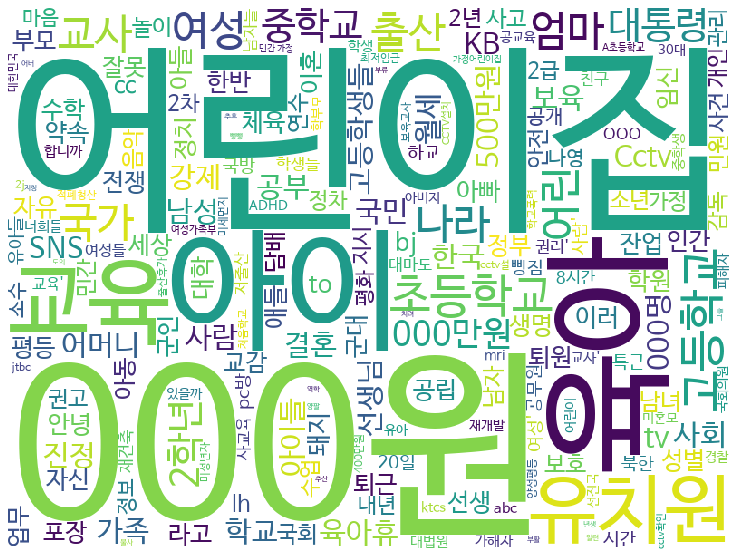

Wall time: 1.26 s


In [25]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))